<a href="https://colab.research.google.com/github/Aarjav-D/Twitter-Sentiment-Analysis/blob/main/TwitterPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random


In [102]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [103]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [104]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))
print('\n The type of all_positive_tweets is ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

 The type of all_positive_tweets is  <class 'list'>
The type of a tweet entry is:  <class 'str'>


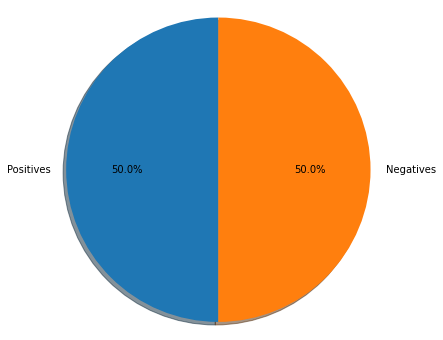

In [105]:
fig1 = plt.figure(figsize=(6,6))
labels='Positives', 'Negatives'
sizes= [len(all_positive_tweets), len(all_negative_tweets)]
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.show()


In [106]:
# prints one random positive tweet in green colour
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])
# prints one random negative tweet in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

Tonight is the Night ... :) #nuka #penacova #djset #free #EDM #kizomba #latinhouse #HouseMusic #portugal2015 #summer http://t.co/m5WqWKfqs3
@OTRRM : ( i'm like your major fan (!!) i just have this bias syndrome that i get shy around my biases : ((((


In [107]:
tweet= all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [108]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
import re
import string
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [110]:
tweet2= re.sub(r'^RT[\s]+', '',tweet)
tweet2= re.sub(r'https?://[^\s\n\r]+', '',tweet2)
tweet2= re.sub(r'#', '',tweet2 )
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [111]:
tokenizer= TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
tweet_tokens= tokenizer.tokenize(tweet2)
print("The Tokenized tweet is: ", tweet_tokens)



The Tokenized tweet is:  ['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [112]:
eng_stopwords= stopwords.words('english')
print("Stopwords\n", eng_stopwords)
print("\nPunctuation\n")
print(string.punctuation)

Stopwords
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

In [113]:
clean_tweets= []
for word in tweet_tokens:
    if(word not in eng_stopwords and word not in string.punctuation):
       clean_tweets.append(word)

print('removed stopwords and punctuation: ')   
print(clean_tweets)

removed stopwords and punctuation: 
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [116]:
stemmer= PorterStemmer()
tweets_stem=[]
for word in clean_tweets:
    stem_word=stemmer.stem(word)
    tweets_stem.append(stem_word)

print('Tweet after stemming: ')
print(tweets_stem)

Tweet after stemming: 
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
